In [1]:
import pymysql
import json
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from cryptography.fernet import Fernet
from collections import namedtuple

%matplotlib inline


In [5]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<b> Decrypt the credentials </b>

In [2]:
#Uncode the secret license file
def unencrypt():
    try:
        key = b'IXx5rHfP15FqP4ahx2pwcud-XmcBzU553Ri6p-nVhnc=' #Fernet.generate_key()
        cipher_suite = Fernet(key)
        with open('/usr/local/etc/musicmood_bytes.bin', 'rb') as file_object:
            for line in file_object:
                encryptedpwd = line
        uncipher_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encryptedpassword = bytes(uncipher_text).decode("utf-8") #convert to string
        x = json.loads(plain_text_encryptedpassword, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
        return x
    except Exception as e:
        print(str(e))
        return "Error" 

<b> Connect to the Database </b>

In [3]:
#Setup the database connection
credentials = unencrypt()
user_id = credentials.user
user_password = credentials.password
dbname = credentials.dbname
server = credentials.server
conn = pymysql.connect(server,user_id,user_password,dbname)

<b> Obtain the data from the Database </b>

In [6]:
start_time = time.time()
df = pd.read_sql('SELECT * FROM songs_instance where trackid IS NOT NULL', con = conn)
print("--- %s seconds ---" % (time.time() - start_time))
df.head(15)

--- 1.5834681987762451 seconds ---


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,genre,Blues,ChildrensMusic,Christian_Gospel,Christmas,Comedy,Country_,Folk,House_Electronic_Trance,Jazz,Last_Position,Latin,Metal,Pop_Standards,Pop,Punk,R_And_B,Rap_Hip_Hop,Rock_And_Roll,Rock,Ska_Reggae_Dancehall,Soul,Soundtrack,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0.624,0.788,0,-8.207,1,0.730,274.355,120.658,3,1.000,3638.1,2970.3,9.60,99.58,12.76,Rock,0,0,0,0,0,0,1,0,0,93,0,0,0,0,0,0,0,0,1,0,0,0,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.0,290.0,0.34,80,229,0.35,1.5270
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,0.213,0.435,4,-5.906,0,0.399,222.586,119.888,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Pop,0,0,0,0,0,0,0,0,0,94,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.0,339.0,0.27,86,285,0.30,1.6483
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,0.398,0.427,9,-6.061,0,0.298,360.240,115.613,4,0.868,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,88,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.0,220.0,0.32,86,285,0.30,1.6483
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,0.000,0.930,1,-8.687,1,0.791,276.962,112.747,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Soul,0,0,0,0,0,0,0,0,0,93,0,0,0,0,0,0,0,0,0,0,1,0,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.0,283.0,0.34,83,265,0.31,1.4474
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,0.311,0.364,10,-13.811,0,0.362,381.515,131.183,4,0.000,2862.5,2317.5,7.18,82.38,20.70,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.0,524.0,0.25,83,265,0.31,1.4474
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,12,14,16,30,1985-09-07,1985,1986-01-25,1986,1980,253,0.305,0.631,3,-12.894,0,0.629,247.130,87.268,4,0.709,4346.7,3516.3,7.19,107.60,10.72,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.823576,0.590181,ORIGINAL,1985,97.0,243.0,0.40,83,265,0.31,1.4474
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,13,14,15,27,1974-08-03,1974,1974-12-07,1974,1970,203,0.194,0.409,10,-11.170,0,0.326,194.258,102.516,4,0.554,1548.8,1249.3,5.64,49.32,16.63,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.757921,0.600265,ORIGINAL,1974,107.0,279.0,0.38,83,265,0.31,1.4474
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,17,18,20,26,1983-01-22,1983,2014-06-07,2014,1980,383,0.154,0.461,9,-5.038,0,0.487,367.926,117.032,4,0.533,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,73,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.866520,0.766545,ORIGINAL,1983,97.0,394.0,NaN,86,285,0.30,1.6483
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,17,19,19,25,1979-11-03,1979,1980-04-12,1980,1970,204,0.108,0.269,11,-6.029,1,0.767,196.034,114.547,4,0.507,2632.1,2078.2,5.85,72.58,17.07,Pop,0,0,0,0,0,0,0,0,0,76,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.855245,0.899992,ORIGINAL,1979,97.0,394.0,NaN,86,285,0.30,1.6483
9,TRXHRYZ128F4264957,1302,Don't Stop 'til You Get Enough,Michael Jackson

<B> Describe the dataset </B>

In [7]:
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12251.000000,12251.000000,12251.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,10621.000000,10621.000000,7129.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,237.804162,0.487354,0.312536,5.315300,-9.215717,0.709914,0.324624,143.095367,124.189140,3.626030,0.327048,3079.651620,2531.830355,3.816110,62.197439,6.488221,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,86.935599,259.026551,0.375365,87.425214,259.429376,0.341456,1.415320
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,90.091553,1.200158,0.317765,3.588874,3.902081,0.453820,0.282247,122.733295,31.397375,1.114364,0.383979,4312.150791,3587.574412,3.086063,68.105618,5.557129,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,36.722043,134.066366,0.127108,21.491572,73.601847,0.035276,0.375069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.000000,0.000000,0.000000,2.000000,-11.644000,0.000000,0.000000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,66.000000,174.000000,0.290000,80.000000,229.000000,0.310000,1.398200
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,227.000000,0.000000,0.253000,5.000000,-8.686000,1.000000,0.373000,164.148000,121.603996,4.000000,0.069000,942.500000,730.700000,4.740000,34.790000,7.330000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,82.000000,240.000000,0.360000,80.000000,229.000000,0.350000,1.527000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,272.000000,0.339000,0.586000,9.000000,-6.260500,1.000000,0.562000,228.557000,141.956000,4.000000,0.680500,4590.200000,3725.700000,5.950000,109.690000,10.050000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,100.000000,312.000000,0.440000,86.000000,265.000000,0.350000,1.527000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,1241.000000,18.640000,1.000000,11.000000,-0.278000,1.000000,1.000000,1208.030000,249.559006,7.000000,1.000000,19390.600000,16427.300000,9.710000,235.5600

There are some missing data that will require imputing values like words_song_u, words_song, words_song_r

<b> Histograms </b>

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124dc29b0>,
      dtype=object)

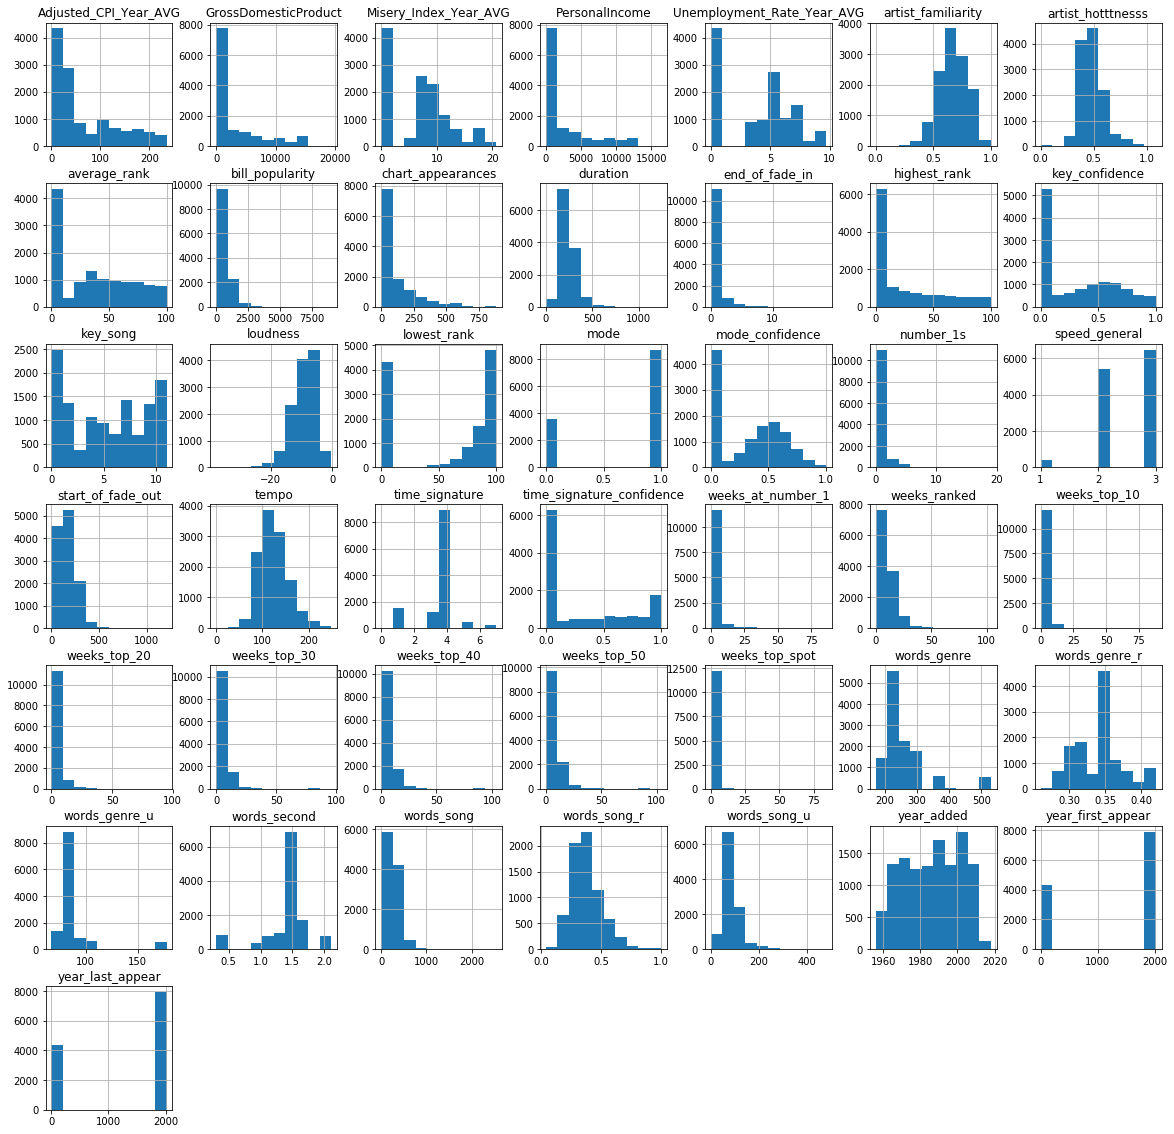

In [11]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)

In [13]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

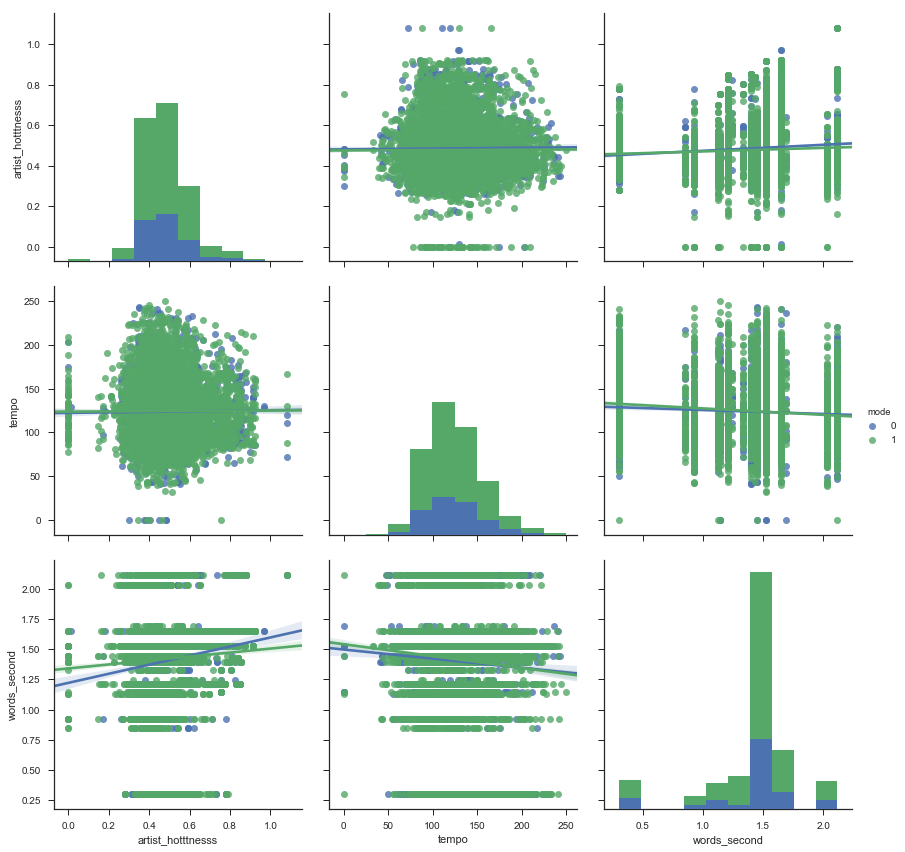

In [20]:
g = sns.pairplot(df, size=4, vars=['artist_hotttnesss','tempo','words_second'], hue='mode', kind="reg")

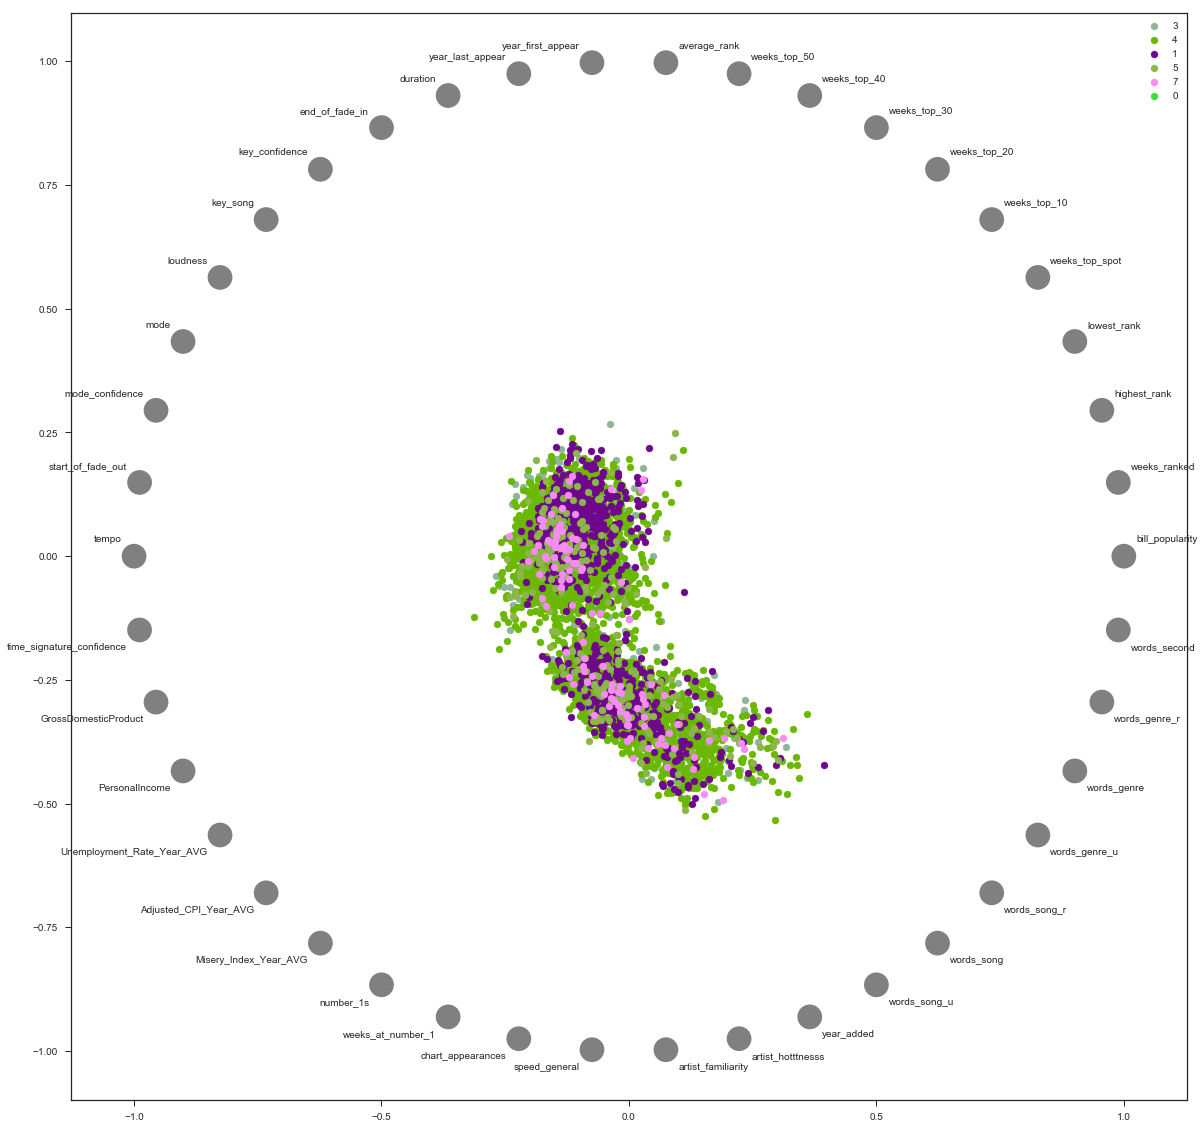

In [26]:
songs = df.select_dtypes(include=['float64','int64','uint8']).copy()
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
rad_viz = pd.plotting.radviz(songs, 'time_signature', ax =ax)

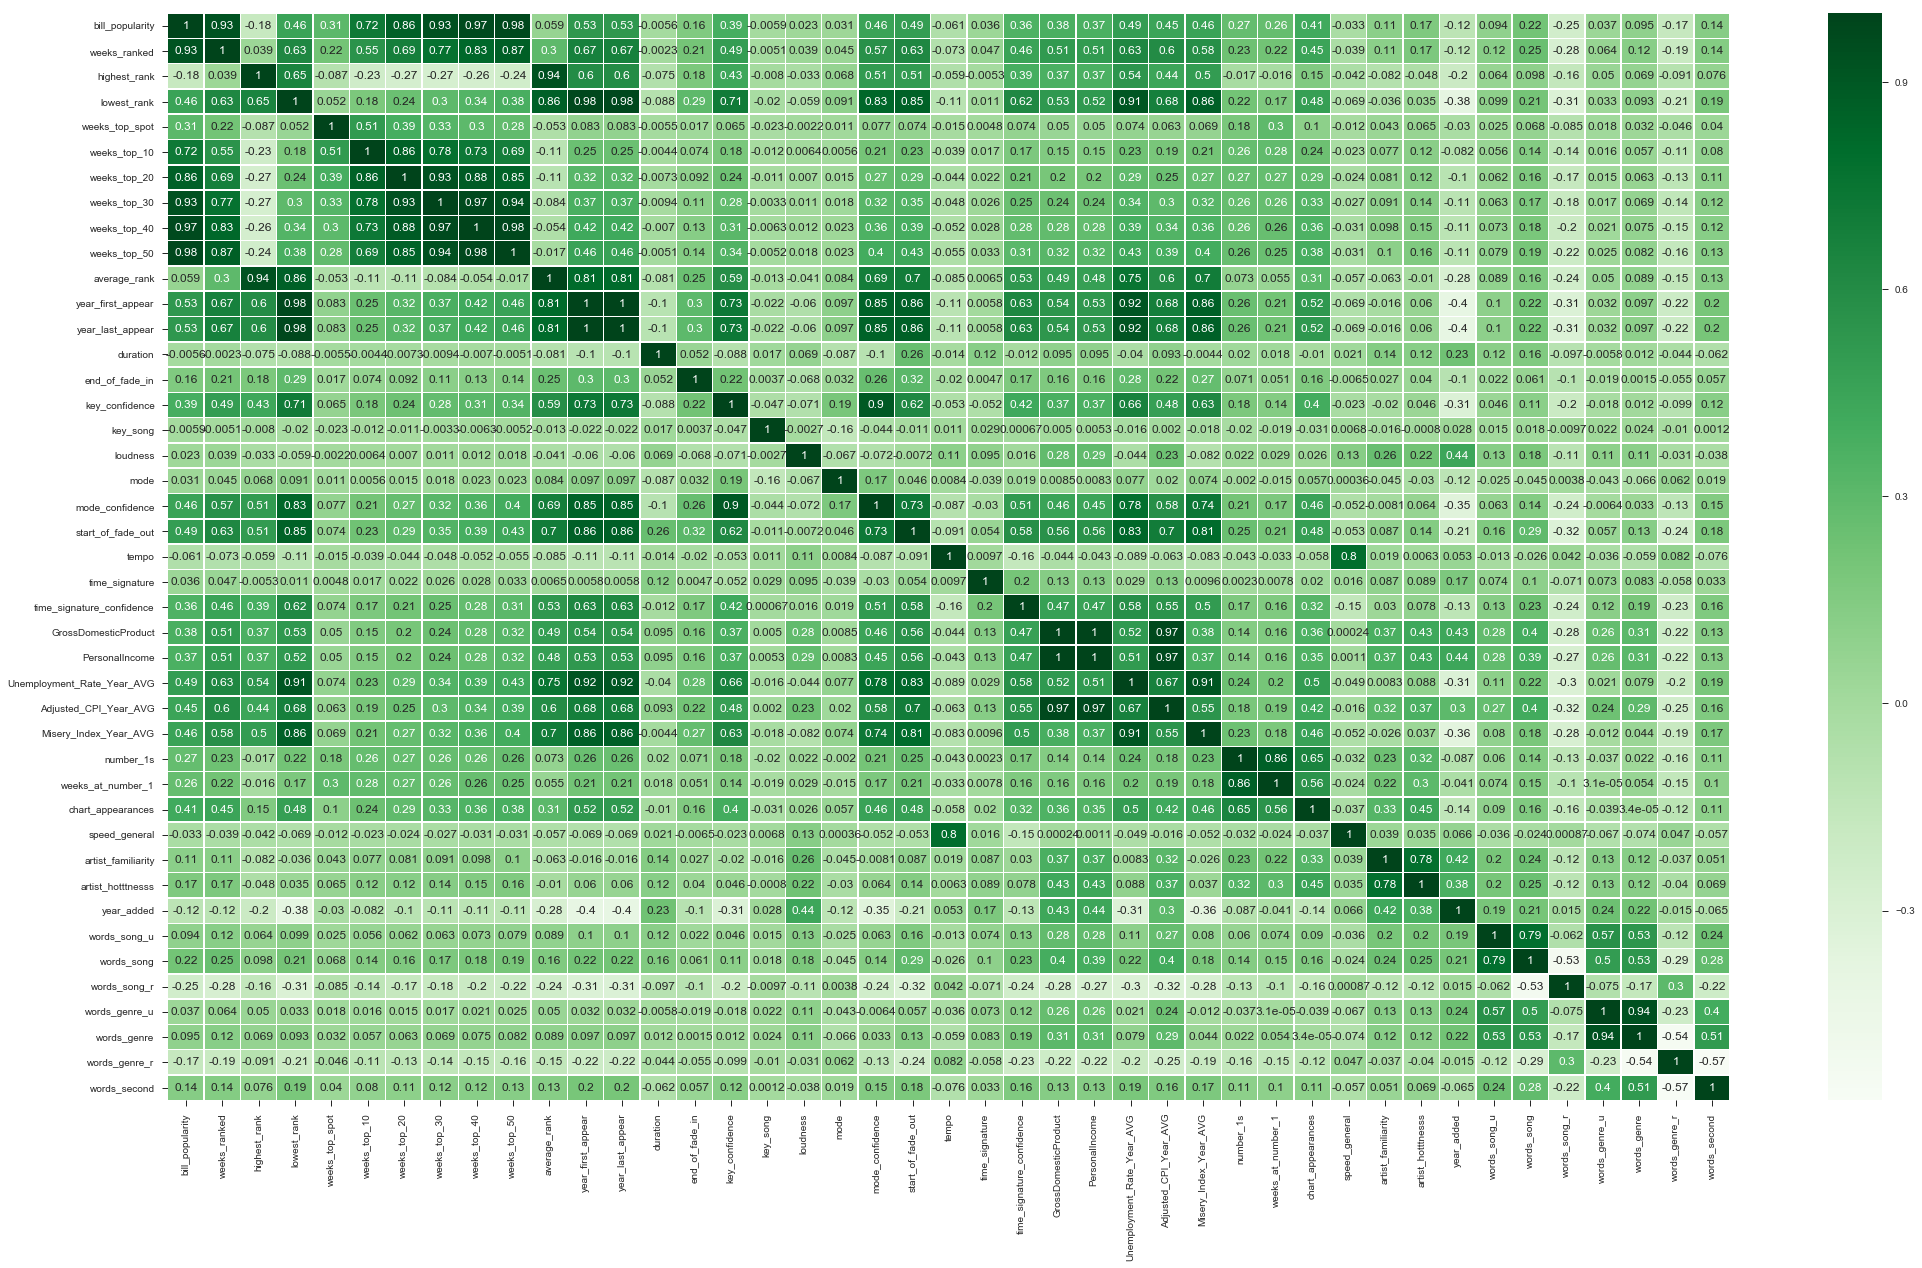

In [27]:
import seaborn as sns
corr = songs.corr()
fig, ax = plt.subplots(figsize=(35,20)) 
ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=.5, cmap="Greens")
plt.show()